In [49]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

### Read the input file and check the data dimension

In [103]:
gercredit= pd.read_csv("german_credit.csv")
gercredit.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [99]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable
gercredit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 0
Data columns (total 20 columns):
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000 non-null object
people_under_maintenance      1000 

In [100]:
gercredit.shape

(1000, 20)

In [101]:
gercredit.columns

Index(['account_check_status', 'duration_in_month', 'credit_history',
       'purpose', 'credit_amount', 'savings', 'present_emp_since',
       'installment_as_income_perc', 'personal_status_sex', 'other_debtors',
       'present_res_since', 'property', 'age', 'other_installment_plans',
       'housing', 'credits_this_bank', 'job', 'people_under_maintenance',
       'telephone', 'foreign_worker'],
      dtype='object')

In [104]:
# Check missing values
gercredit.isnull().sum().sort_values(ascending=False)

foreign_worker                0
personal_status_sex           0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
other_debtors                 0
telephone                     0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
default                       0
dtype: int64

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [169]:
X = gercredit.drop("default", axis=1)
Y = gercredit["default"]
test_size = 0.50 # taking 50:50 training and test set
seed = 77  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

newY=Y_train


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [170]:
# Print Shape of model data
newX=pd.get_dummies(X_train,drop_first= True)
newX.shape


(500, 48)

In [171]:
newX.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
946,24,3349,4,4,30,1,2,1,0,0,...,1,1,0,0,0,1,0,0,1,1
934,12,1498,4,1,23,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
449,15,1512,3,3,61,2,1,0,0,0,...,0,0,1,1,0,1,0,0,0,1
246,12,717,4,4,52,3,1,0,0,1,...,0,1,0,1,0,1,0,0,0,1
463,12,754,4,4,38,2,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1


In [172]:
newX.columns

Index(['duration_in_month', 'credit_amount', 'installment_as_income_perc',
       'present_res_since', 'age', 'credits_this_bank',
       'people_under_maintenance', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs', 'purpose_retraining', 'savings_... < 100 DM',
       'savings_100 <= ... < 500 DM', 'savings_500 <= ... < 1000 DM ',
       'savings_unknown/ no savings account',
       '

### Check for highly correlated variables but don't required any treatment for this use case

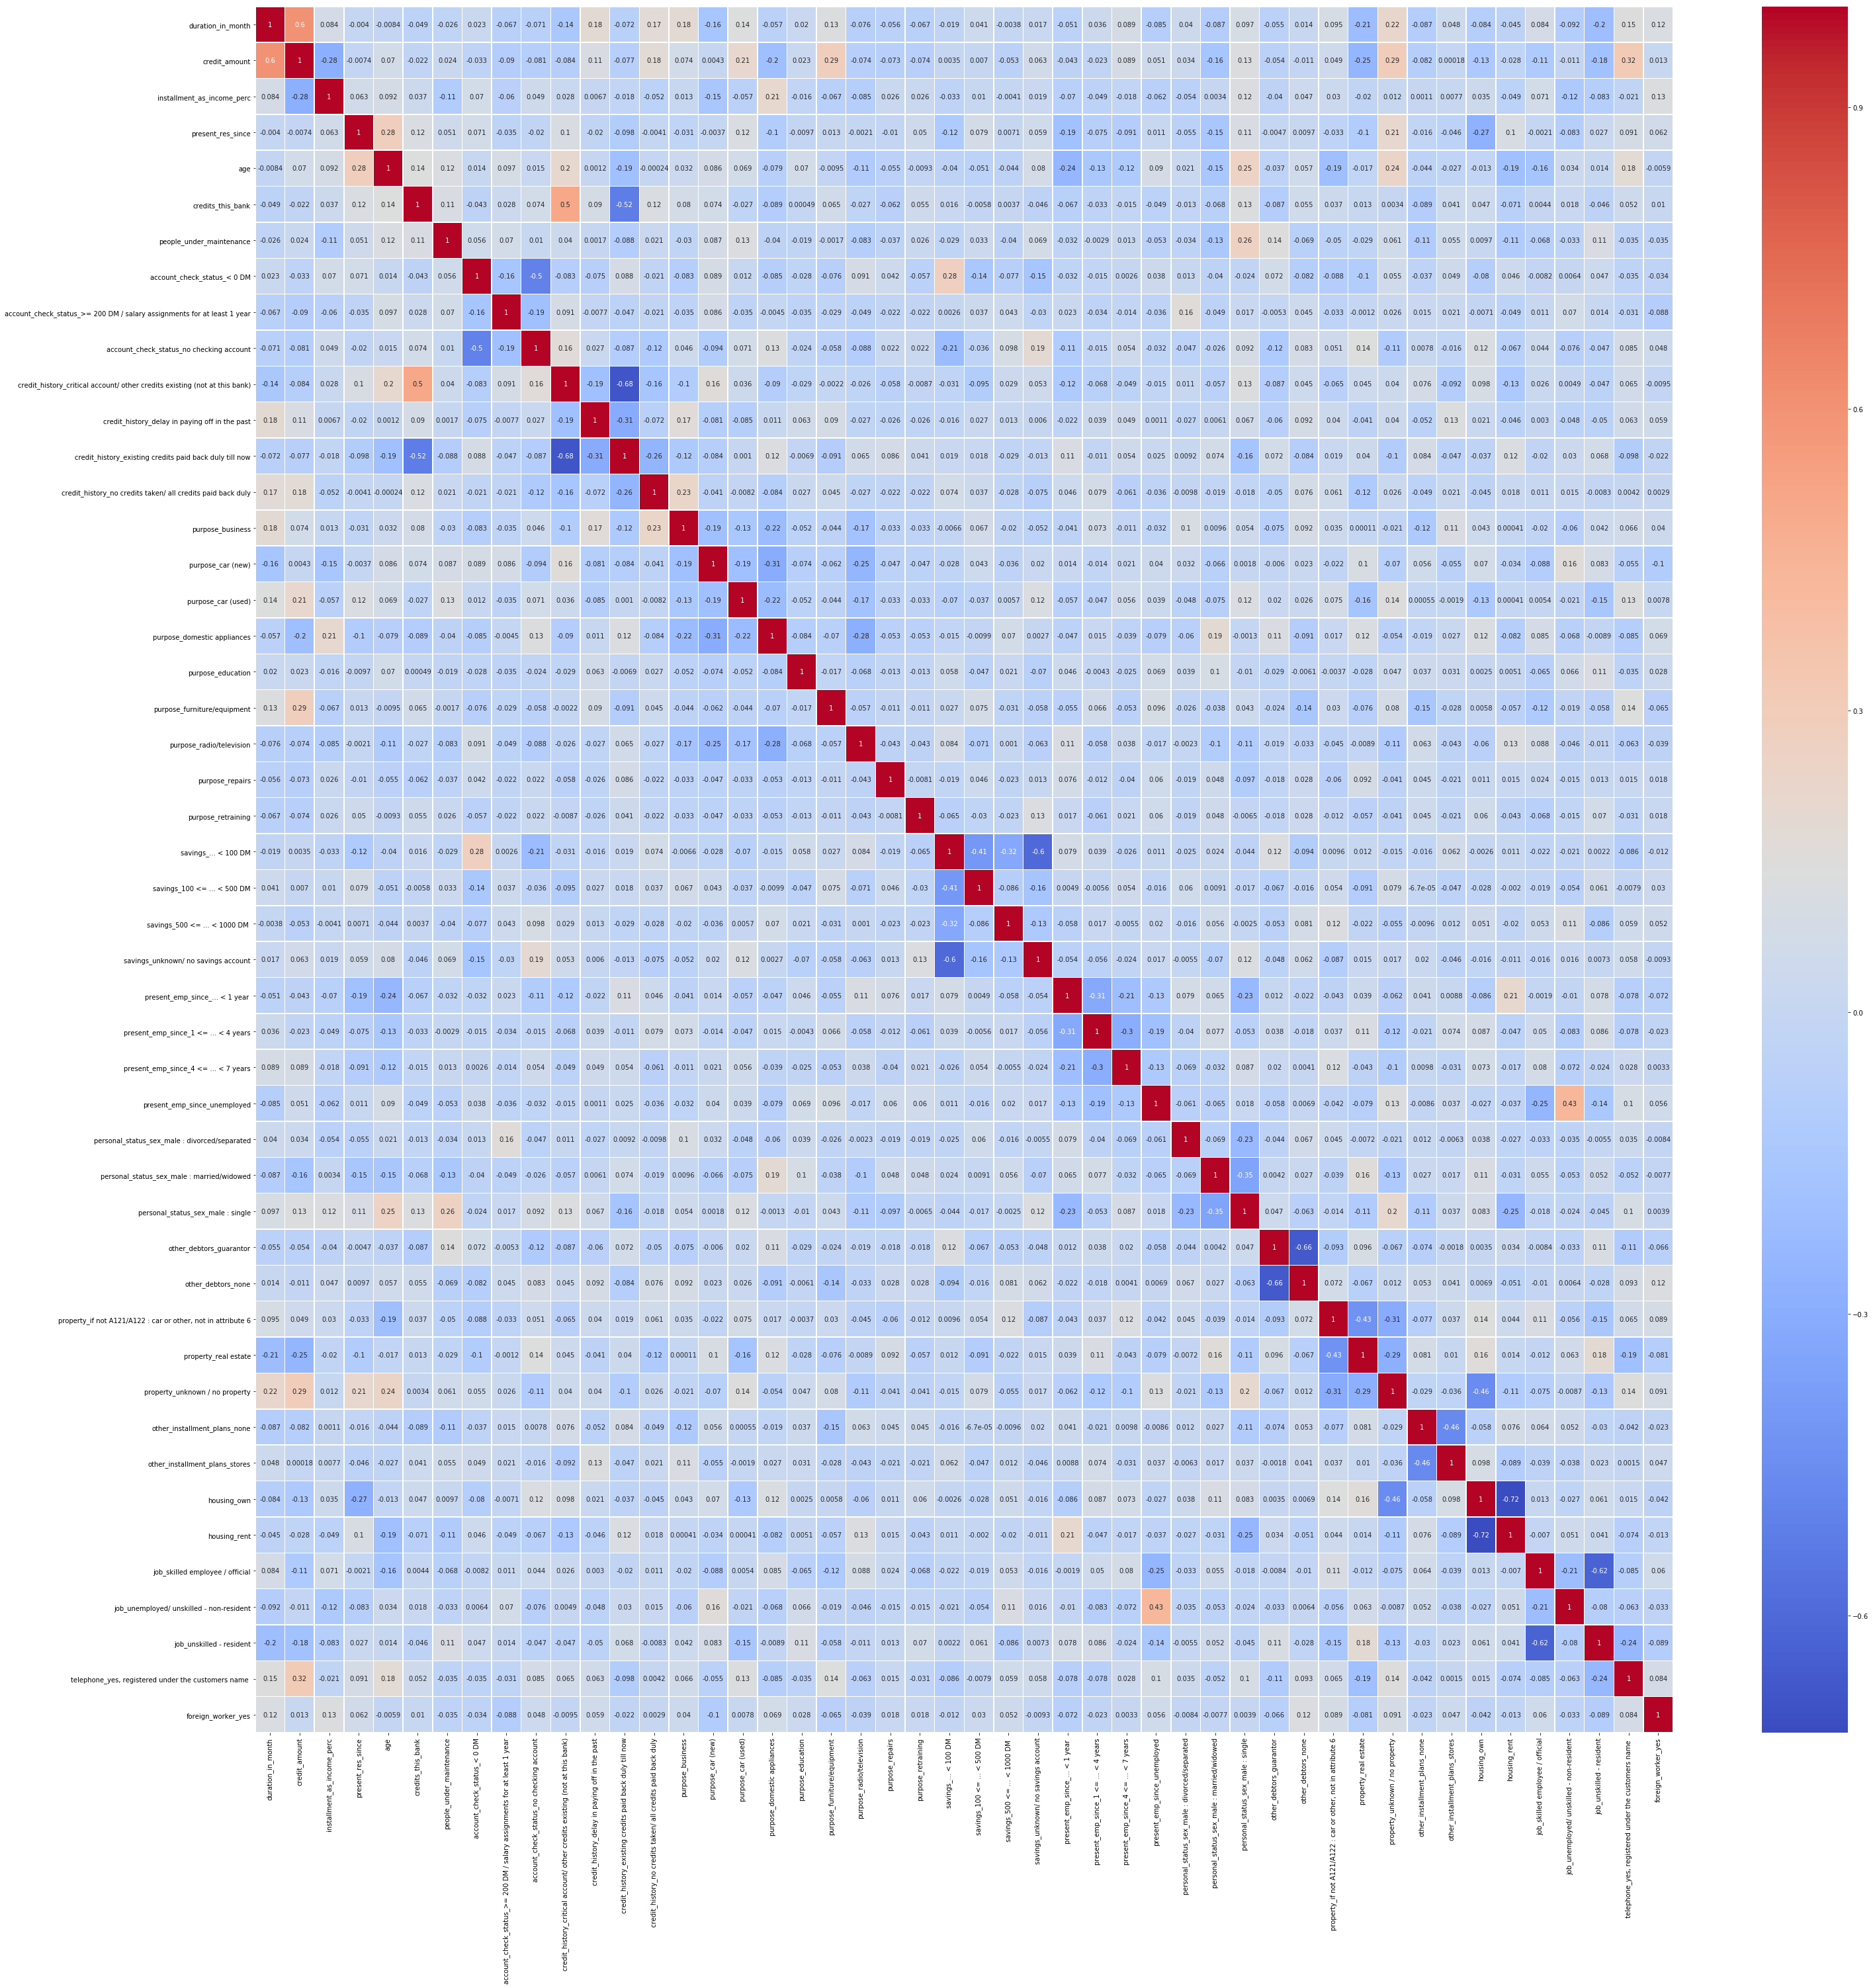

In [173]:
fig, ax = plt.subplots(figsize=(48,48))
sns.heatmap(newX.corr(), annot=True, linewidths=.5, ax=ax,cmap='coolwarm')


In [174]:
#From  matrix 
#1)'duration_in_month' is higly and positively correlated with 'credit_amount' with 0.67
#2)job_unemployed/unskilled-non-resident is highly negatively correlated with jon_unskilled-resident with -0.65

### Drop the original variables which are converted to dummy

In [175]:
#after doing get_dummies the original categorical vaiables are converted into dummy variables and  
#original variables are already dropped

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [176]:

test_size = 0.3 # taking 70:30 training and test set
seed = 77  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(newX, newY, test_size=test_size, random_state=seed)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [177]:
#Random Forest Model
#============================================================================
model_rf = RandomForestClassifier(n_jobs=2,n_estimators=99,criterion='entropy',random_state=9999)
model_rf.fit(X_train,Y_train)
Rf_predict=model_rf.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [155]:
#Confusion Mtrix for Random Forest 
#===================================
metrics.confusion_matrix(Y_test,Rf_predict)

array([[85,  9],
       [37, 19]], dtype=int64)

In [134]:
#Accuracy for Random Forest 
#======================================
testAccuracy = metrics.accuracy_score(Y_test,Rf_predict)
print (testAccuracy)

0.6933333333333334


### Q6 Show the list of the features importance( 1 Marks)

In [150]:
feature = pd.Series(model_rf.feature_importances_)

n_cols=('duration_in_month', 'credit_amount', 'installment_as_income_perc',
       'present_res_since', 'age', 'credits_this_bank',
       'people_under_maintenance', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs', 'purpose_retraining', 'savings_... < 100 DM',
       'savings_100 <= ... < 500 DM', 'savings_500 <= ... < 1000 DM ',
       'savings_unknown/ no savings account',
       'present_emp_since_... < 1 year ',
       'present_emp_since_1 <= ... < 4 years',
       'present_emp_since_4 <= ... < 7 years', 'present_emp_since_unemployed',
       'personal_status_sex_male : divorced/separated',
       'personal_status_sex_male : married/widowed',
       'personal_status_sex_male : single', 'other_debtors_guarantor',
       'other_debtors_none',
       'property_if not A121/A122 : car or other, not in attribute 6',
       'property_real estate', 'property_unknown / no property',
       'other_installment_plans_none', 'other_installment_plans_stores',
       'housing_own', 'housing_rent', 'job_skilled employee / official',
       'job_unemployed/ unskilled - non-resident', 'job_unskilled - resident',
       'telephone_yes, registered under the customers name ',
       'foreign_worker_yes')
feature_df = pd.DataFrame([list(feature)], columns=n_cols )
temp=feature_df.sort_values(by=0, ascending=False, axis=1)
temp.transpose()

,0
credit_amount,0.110138
age,0.097546
duration_in_month,0.077613
account_check_status_no checking account,0.073433
installment_as_income_perc,0.047088
present_res_since,0.044120
account_check_status_< 0 DM,0.028859
"telephone_yes, registered under the customers name",0.022317
credits_this_bank,0.021378
credit_history_critical account/ other credits existing (not at this bank),0.021149


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [90]:
# Use below values
num_folds = 10
seed = 77

In [91]:
#Validate the Random Forest model build above using k fold

In [158]:
kfold = model_selection.KFold(n_splits=num_folds,random_state=seed)
cv_results = model_selection.cross_val_score(model_rf,newX,newY, cv=kfold, scoring='accuracy')
cv_results

array([0.6 , 0.74, 0.7 , 0.72, 0.8 , 0.76, 0.72, 0.76, 0.84, 0.76])

In [159]:
#Calculate Mean score

In [160]:
np.mean(cv_results)

0.74

In [161]:
# Calculate score standard deviation using std()

In [162]:
np.std(cv_results)

0.060663003552412414

# Q8 Print the confusion matrix( 1 Marks)

In [178]:
Rf_new_predict=model_rf.predict(X_test)
metrics.confusion_matrix(Y_test,Rf_new_predict)

array([[85,  9],
       [37, 19]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [179]:
#metrics for random forst
#==============================
testAccuracy = metrics.accuracy_score(Y_test,Rf_new_predict)
testRecall = metrics.recall_score(Y_test,Rf_new_predict)
testPrecision = metrics.precision_score(Y_test,Rf_new_predict)
testF1score = metrics.f1_score(Y_test,Rf_new_predict)
print("Metrics for random forest \n Accuracy= %f \n Recall= %f \n Precision= %f \n F1Score= %f" %(testAccuracy,testRecall,testPrecision,testF1score))


Metrics for random forest 
 Accuracy= 0.693333 
 Recall= 0.339286 
 Precision= 0.678571 
 F1Score= 0.452381


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

In [182]:
from sklearn.metrics import roc_curve, auc
y_predictProb = model_rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.7385068389057752

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

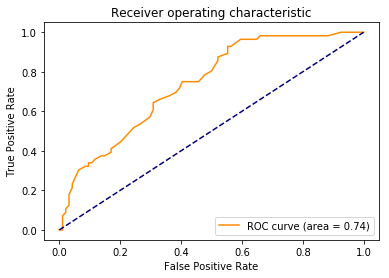

In [183]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
